Columns: Index(['timestamp', 'close', 'high', 'low', 'open', 'volume', 'basis', 'PCR',
       'EMA_5', 'EMA_15', 'SMA_20', 'SMA_50', 'market_return', 'regime',
       'position', 'strategy_return'],
      dtype='object')

Return summary:
count    4250.000000
mean       -0.000001
std         0.000569
min        -0.005545
25%        -0.000272
50%         0.000008
75%         0.000274
max         0.005104
Name: market_return, dtype: float64
Z-score outliers: 57
IQR outliers: 218


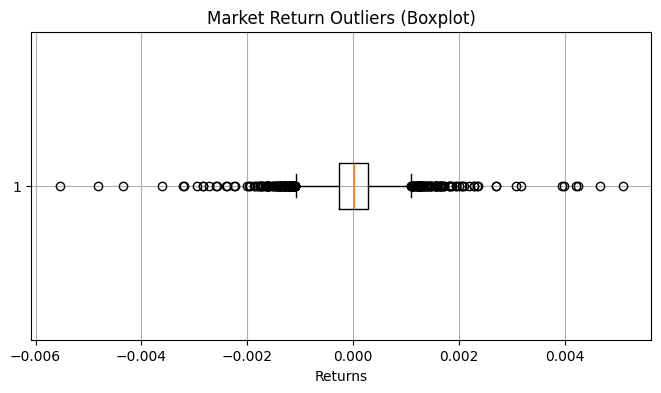

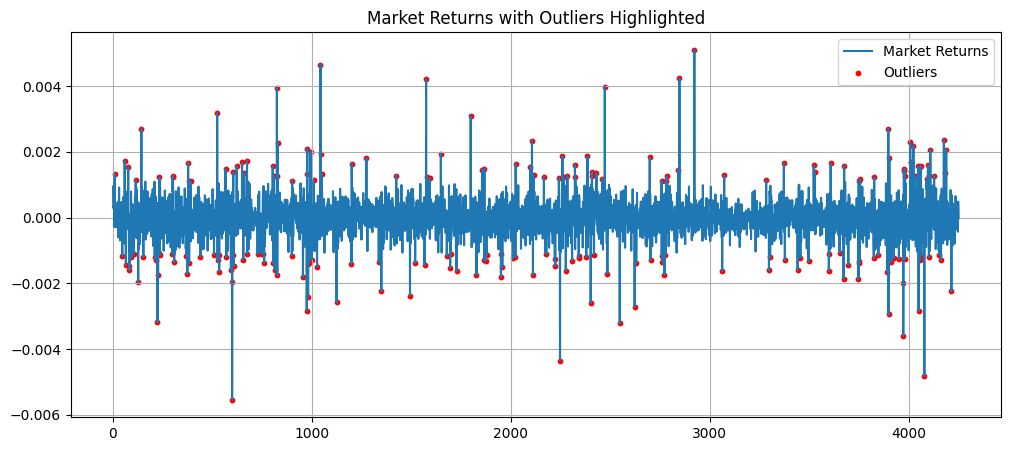

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# 1. Load Data
# ===============================
df = pd.read_csv("../DATA/merged/nifty_with_regime.csv")

print("Columns:", df.columns)

# ===============================
# 2. Create Market Returns
# ===============================
df["market_return"] = df["close"].pct_change()

# Drop NaNs created by pct_change
df = df.dropna(subset=["market_return"])

returns = df["market_return"]

print("\nReturn summary:")
print(returns.describe())

# ===============================
# 3. Z-Score Outlier Detection
# ===============================
mean = returns.mean()
std = returns.std()

df["z_score"] = (returns - mean) / std
z_outliers = df[np.abs(df["z_score"]) > 3]

print("Z-score outliers:", len(z_outliers))

# ===============================
# 4. IQR Outlier Detection
# ===============================
Q1 = returns.quantile(0.25)
Q3 = returns.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_outliers = df[(returns < lower) | (returns > upper)]

print("IQR outliers:", len(iqr_outliers))

# ===============================
# 5. Boxplot
# ===============================
plt.figure(figsize=(8, 4))
plt.boxplot(returns, vert=False)
plt.title("Market Return Outliers (Boxplot)")
plt.xlabel("Returns")
plt.grid(True)
plt.show()

# ===============================
# 6. Time Series with Outliers
# ===============================
plt.figure(figsize=(12, 5))
plt.plot(df.index, returns, label="Market Returns")
plt.scatter(
    iqr_outliers.index,
    iqr_outliers["market_return"],
    color="red",
    s=10,
    label="Outliers"
)
plt.title("Market Returns with Outliers Highlighted")
plt.legend()
plt.grid(True)
plt.show()

# ===============================
# 7. Save Results
# ===============================
iqr_outliers.to_csv("../RESULTS/return_outliers.csv", index=False)
